In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### PART I. LOGISTIC REGRESSION MODEL DEVELOPMENT

In this laboratory exercise, you will make a logistic regression model with L2 regularization that can be used to fit data of any dimension (i.e. any # of features and # of samples). Again, as classes enable you to easily share data among different functions, you are encouraged to use them. To aid in the model development, use the data in “./labex2/data/labex2_part1.csv.” Answer the following questions. 

In [2]:
#creating a Linear Regression class
class LinearRegression:
    
    def __init__(self, file_name = "", alpha= 0.0005, tolerance = 0.001, max_iter = 10000):
        self.file_name = file_name
        self.alpha = alpha
        self.tolerance = tolerance
        self.max_iter = max_iter
        
        #prepare data
        self.data = pd.read_csv(self.file_name) #read csv file
        self.x = self.data.iloc[:,:-1] #separate all x features 
        ones = pd.DataFrame(np.ones(self.data.iloc[:, -1:].shape[0])) #make x_0 = 1 
        self.x = pd.concat([ones,self.x], axis=1) #add x_0 to the x features
        self.x = np.asmatrix(self.x)
        self.y = np.asmatrix(self.data.iloc[:, -1:])
        
    
        
        #generate random theta
        self.theta = np.asmatrix((2*np.random.rand(self.x.shape[1]))-1).T
        
        self.h = None
        self.hy_diff = None
        self.j = None
        self.gradient = None
        
        #make an initial list where you append J
        self.cost = []
    
    # Compute hypothesis function 
    def eval_h(self):
        self.h = np.dot(self.x,self.theta)
    
    # Compute cost function 
    def eval_j(self):
        self.hy_diff = self.h - self.y
        self.j = (1/(2*self.y.shape[0]))* np.dot(self.hy_diff.T, self.hy_diff)[0,0]
        
    # Compute the gradient of J
    def gradient_j(self):
        self.gradient = (1/self.y.shape[0])* np.dot(self.x.T, self.hy_diff)
     
    # Update equation for gradient descent
    def update_theta(self):
        self.theta = self.theta - self.alpha * self.gradient
    
    #Initiate regression
    def regression(self):
        for i in range(int(self.max_iter)):
            self.eval_h()
            self.eval_j()
            self.cost.append(self.j)
            self.gradient_j()
            self.update_theta()
            if i>0 and abs(self.cost[i]-self.cost[i-1])<= self.tolerance:
                print("Ending at iteration:", i+1)
                break
                 
                
    #plot results
    def graph(self,label=""):
        x = np.arange(0,len(self.cost),1)
        y = np.array(self.cost)
        plt.xlabel('Training iterations')
        plt.ylabel('Cost function')
        plt.grid()
        plt.plot(x, y, label=label)
        plt.show

In [3]:
#creating a Logistic Regression class using inheritance
class LogisticRegression(LinearRegression):
    
    def __init__(self, file_name = "", alpha = 0.0005, tolerance = 0.000001, max_iter = 10000):
        super().__init__(file_name, alpha, tolerance, max_iter)
        
    def regularize(self, Lambda, Type = 'L2'):
        self.regularized = False
        self.Lambda = Lambda
        self.Type = Type
        theta = self.theta[1:]
        if Type == 'L2' or Type == 'l2':
            self.reg = self.Lambda * (np.dot(theta.T,theta)[0,0])
        elif Type == 'L1' or Type == 'l1':
            self.reg = self.Lambda * (np.dot(ones, abs(theta))[0,0])
        self.regularized = True
        
    def eval_h(self):
        self.h = 1/(1+ np.exp(np.dot(self.x,self.theta)*-1))
        
    def eval_j(self):
        logh = np.log(self.h)
        log1h = np.log(1-self.h)
        ans = (np.dot(self.y.T, logh)[0,0] + np.dot(1-self.y.T, log1h)[0,0])*-1
        self.j = ans*(1/self.y.shape[0]) if not self.regularized else ((ans + (self.reg / 2))*(1/self.y.shape[0]))
    
    def gradient_j(self):
        hydiff = self.h - self.y
        zero = np.asmatrix([[0.]])
        theta = np.vstack((zero, self.theta[1:]))
        self.gradient0 = np.dot(self.x.T, hydiff)
        self.gradient = (self.gradient0*(1/self.y.shape[0])) if not self.regularized else (self.gradient0 + (self.Lambda * theta))*(1/self.y.shape[0])
        
    def update_theta(self):
        theta = self.theta[1:]*(1-(self.alpha*self.Lambda)/self.y.shape[0])-self.alpha*(self.gradient0[1:]/self.y.shape[0])
        theta0 = self.theta[0]-self.alpha*(self.gradient0[0]/self.y.shape[0])
        self.theta = np.vstack((theta0, theta))
        
    def classify(self, N = 0):
        for i in range(self.y.shape[0]):
            self.y[i,0] = 1 if self.y[i,0] == N else 0

#### 1.	To have an idea on what features would be good for the logistic regression model, create a scatter plot of the data (it is 2D). What do you observe?

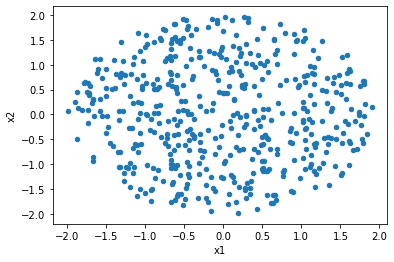

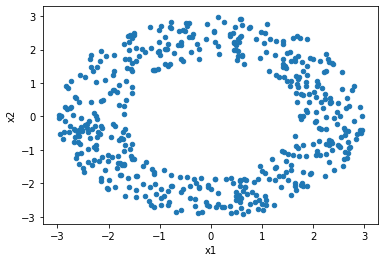

In [4]:
#read data
data1 = pd.read_csv('labex2_part1.csv')

#x1^2 and x2^2 were added to the csv file
#calling the original csv
data1_orig = data1.iloc[:, 2:]

#classifying data
datasets = {}
classes = data1_orig.groupby('y')


for groups, data in classes:
    datasets[groups] = data
    
#plotting the values for class 1
class1 = datasets[0]
class1.plot(kind = 'scatter', x = 'x1', y = 'x2')

#plotting the values for class 2
class2 = datasets[1]
class2.plot(kind = 'scatter', x = 'x1', y = 'x2')

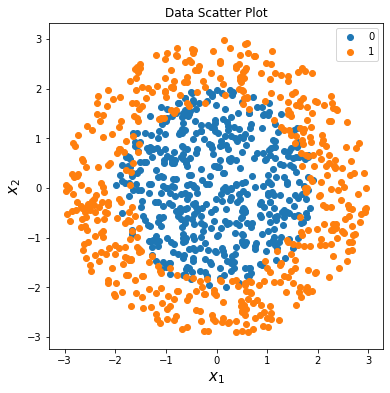

In [5]:
#reading the csv
data1 = pd.read_csv("labex2_part1.csv")
datset = {}


for groups, data in data1.groupby('y'):
    datset[groups] = data

class0 = datset[0]
class1 = datset[1]

#Data Scatterplot
plt.figure(figsize = [6,6])
plt.scatter(class0.x1, class0.x2, label = "0")
plt.scatter(class1.x1, class1.x2, label = "1")
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.legend(title="Class", fontsize = 15)
plt.title("Data Scatter Plot")
plt.legend(loc='best')
plt.show()

From the Data Scatter Plot shown above it is evident that the dataset follows a non-linear decision boundary, this is because we can see that the points labelled `class 0` are clustered in the middle with a radius of approximately 2 units and the points labelled `class 1` are clustered around the `class 0`.


#### 2. What features would be best to use?

From the Data Scatter Plot shown, we got a circular or an ellipse-like form which shows that the data set has a non-linear decision boundary. A non-linear decision boundary that should be created is one which has a similar equation to that of a circle which is a formula that includes the square of both $x_1$ and $x_2$. This means that the best features to use includes both $x_1^2$ and $x_2^2$.


#### 3.	Use sklearn.model_selection.train_test_split to divide the data into two groups: training (80%) and test (20%).

In [6]:
#dividing the data into two groups 80% - Train, 20% - Test
data1_train_orig, data1_test_orig = train_test_split(data1_orig, test_size = 0.2)
data1_train_orig.to_csv('data1_train_orig.csv', index = False)
data1_test_orig.to_csv('data1_test_orig.csv', index = False)

#### 4.	For this item, set α = 0.01 and λ = 10.

##### a.	Train a logistic regression model using the features in the file as is

In [7]:
#define parameters

train_logreg_orig = LogisticRegression('data1_train_orig.csv', alpha = 0.01)
train_logreg_orig.regularize(Lambda = 10)

test_logreg_orig = LogisticRegression('data1_test_orig.csv', alpha = 0.01)
test_logreg_orig.regularize(Lambda = 10)

Ending at iteration: 1000


Text(0.5, 1.0, 'Cost Function vs Number of Iterations')

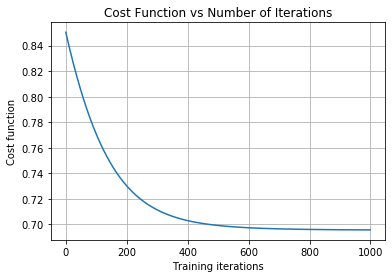

In [8]:
#perform regression and plot the results
train_logreg_orig.regression()
train_logreg_orig.graph()
plt.title('Cost Function vs Number of Iterations')

In [9]:
#applying the hypothesis function 
h = 1 / (1 + np.exp(-1 * np.dot(test_logreg_orig.x, train_logreg_orig.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0

print('Classification Report')
print(classification_report(test_logreg_orig.y, h))
print('\n')
print('Confusion matrix:')
print(confusion_matrix(test_logreg_orig.y, h))

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.89      0.64        91
           1       0.74      0.27      0.39       109

    accuracy                           0.55       200
   macro avg       0.62      0.58      0.52       200
weighted avg       0.63      0.55      0.51       200



Confusion matrix:
[[81 10]
 [80 29]]


##### b.	Train a logistic regression model using the features that you listed in #2.

In [10]:
#using the modified features
data1_train, data1_test = train_test_split(data1, test_size = 0.2)
data1_train.to_csv('data1_train.csv', index = False)
data1_test.to_csv('data1_test.csv', index = False)

In [11]:
#define parameters
train_logreg = LogisticRegression('data1_train.csv', alpha = 0.01)
train_logreg.regularize(Lambda = 10)

test_logreg = LogisticRegression('data1_test.csv', alpha = 0.01)
test_logreg.regularize(Lambda = 10)

Text(0.5, 1.0, 'Cost Function vs Number of Iterations')

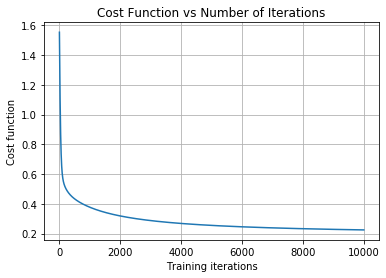

In [12]:
#perform regression and plot the results
train_logreg.regression()
train_logreg.graph()
plt.title('Cost Function vs Number of Iterations')

In [13]:
h = 1 / (1 + np.exp(-1 * np.dot(test_logreg.x, train_logreg.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0

print('Classification Report')
print(classification_report(test_logreg.y, h))
print('\n')
print('Confusion matrix:')
print(confusion_matrix(test_logreg.y, h))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Confusion matrix:
[[91  9]
 [ 9 91]]


##### Compare the following for both a. and b.: cost as a function of training iteration, overall accuracy, precision, recall, and F1 score for the two classes. What can you say regarding the performance of the two models? Which model performs better? Why?     

(a) - original $x_1$ and $x_2$ features only <br>
(b) - with additional features $x_1^2$ and $x_2^2$


<b> Cost as a Function of Training Iteration</b> <br>
(a) converges faster than that of (b). It can be observed that (a) has a higher cost function than that of (.b)

<b> Overall Accuracy, Precision, Recall, and F1 score</b> <br>
(b) yielded higher overall accuracy, precision, recall, and F1 score than that of (a). 

<b> Performance of the two models </b> <br>
It can be seen from the result of (a) that it was not able to accurately classify the dataset. It can also be seen that (b) has better performance than (a) because of the addition of features $x_1^2$ and $x_2^2$, which made it possible for creating a decision boundary that could classify the dataset accurately compared to that of (a) which has lesser features.


##### 5.	Using the feature combination that you think is best, train logistic regression models using the following three different combinations of α and λ.Plot the cost as a function of training iteration and compute the overall accuracy, precision, recall, and F1 score for the two classes. What can you say regarding the results?  

Ending at iteration: 4586
α = 0.1
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       100
           1       0.92      0.86      0.89       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



Confusion matrix:
[[93  7]
 [14 86]]


α = 0.01
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Confusion matrix:
[[91  9]
 [ 9 91]]


α = 0.001
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       100
           1       0.84      0.98   

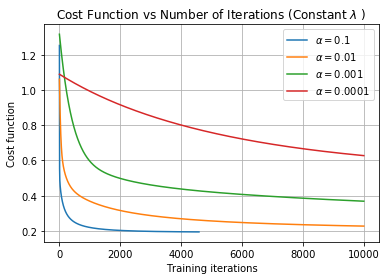

In [14]:
alphas = [0.1, 0.01, 0.001, 0.0001]

for i in alphas:
    train_logreg = LogisticRegression('data1_train.csv', alpha = i)
    train_logreg.regularize(Lambda = 10)
    test_logreg = LogisticRegression('data1_test.csv', alpha = i)
    test_logreg.regularize(Lambda = 10)
    train_logreg.regression()
    h = 1 / (1 + np.exp(-1 * np.dot(test_logreg.x, train_logreg.theta)))
    h[h >= 0.5] = 1
    h[h < 0.5] = 0
    train_logreg.graph(label = r'$\alpha = %$'+str(i))
    print(r'α = '+str(i))
    print('Classification Report')
    print(classification_report(test_logreg.y, h))
    print('\n')
    print('Confusion matrix:')
    print(confusion_matrix(test_logreg.y, h))
    print('\n')
    
plt.title(r'Cost Function vs Number of Iterations (Constant $\lambda$ )')
plt.legend(loc='best')
plt.grid()

As shown in the classification reports of (b) with different learning rate ($\alpha$), it can be observed that for $\alpha$ = 0.1 and $\alpha$ = 0.01, there is no significant difference in the overall accuracy, precision, recall, and F1 score and that only when $\alpha$ = 0.001 and $\alpha$ = 0.0001 that a major change was observed. It can be said that as $\alpha$ decreases, the overall accuracy, precision, recall, and F1 score also decreases. Aside from that, it can be seen from the graph of (b) that as $\alpha$ decreases, the function converges slower. The value for $\alpha$ which should be deemed "just right" should then be taken account in order to arrive at the desired model which could converge faster and give an output with high overall performance.


Ending at iteration: 6451
λ = 1
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       100
           1       0.91      0.91      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Confusion matrix:
[[91  9]
 [ 9 91]]


Ending at iteration: 4598
λ = 10
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       100
           1       0.92      0.86      0.89       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200



Confusion matrix:
[[93  7]
 [14 86]]


Ending at iteration: 1661
λ = 100
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90 

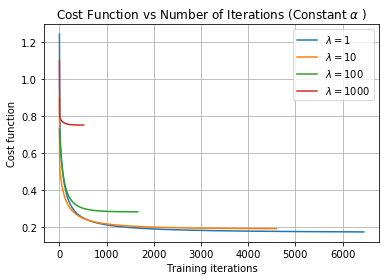

In [15]:
Lambdas = [1, 10, 100, 1000]

for i in Lambdas:
    train_logreg = LogisticRegression('data1_train.csv', alpha = 0.1)
    train_logreg.regularize(Lambda = i)
    test_logreg = LogisticRegression('data1_test.csv', alpha = 0.1)
    test_logreg.regularize(Lambda = i)
    train_logreg.regression()
    h = 1 / (1 + np.exp(-1 * np.dot(test_logreg.x, train_logreg.theta)))
    h[h >= 0.5] = 1
    h[h < 0.5] = 0
    train_logreg.graph(label = r'$\lambda = %$'+str(i))
    print(r'λ = '+str(i))
    print('Classification Report')
    print(classification_report(test_logreg.y, h))
    print('\n')
    print('Confusion matrix:')
    print(confusion_matrix(test_logreg.y, h))
    print('\n')
    
plt.title(r'Cost Function vs Number of Iterations (Constant $\alpha$ )')
plt.legend(loc='best')
plt.grid()

As shown in the classification reports of (b) with different regularization constant ($\lambda$), it can be seen that as the value for $\lambda$ increases, the average precision also increases. From the graph, it can be seen that as $\lambda$ increases, the function drops at a higher cost compared to those of functions having lower $\lambda$ values, it could also be seen that as $\lambda$ increases, the function converges faster since it converges at lower iterations. Upon creating a classification model, the $\lambda$ should also be noted because if $\lambda$ = very large, the parameters get heavily penalized and thus it could result to underfitting.
